# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>
</div>
You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****


In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [6]:
import numpy as np
import math
import random
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'  #set png here when working on notebook
%matplotlib inline

In [7]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


1) Investigate the distribution. Look at starard deviation, plot, and skewness of the data.

In [10]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


With a range from min to max of 4.5 degrees and a standard deviation of .7 means a third of the entire range falls within 1 standard deviation.

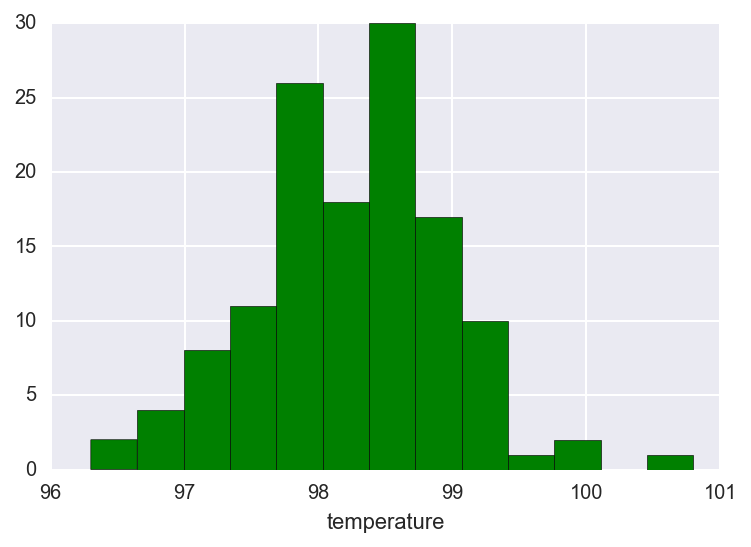

In [29]:
sns.distplot(df['temperature'], kde = False, color = 'g', hist_kws={'alpha': 1.0})

In [18]:
from scipy.stats import skew
numeric_features = df.dtypes[df.dtypes != "object"].index

skewed_features = df[numeric_features].apply(lambda x: skew(x.dropna())) #compute skew factor
skewed_features

temperature   -0.004368
heart_rate    -0.176288
dtype: float64

Low skew factors abs(skew)<.75

2) Sample Size and independence

In [20]:
len(df)

130

In [28]:
len(df[df['gender']=='M'])

65

130 samples: 65 Male and 65 Female
No information on randomness of geolocation or other factors

In [34]:
df[['temperature','gender']].groupby(['temperature']).agg(['count'])

,gender
,count
temperature,
96.3,1
96.4,1
96.7,2
96.8,1
96.9,1
97.0,1
97.1,3
97.2,3


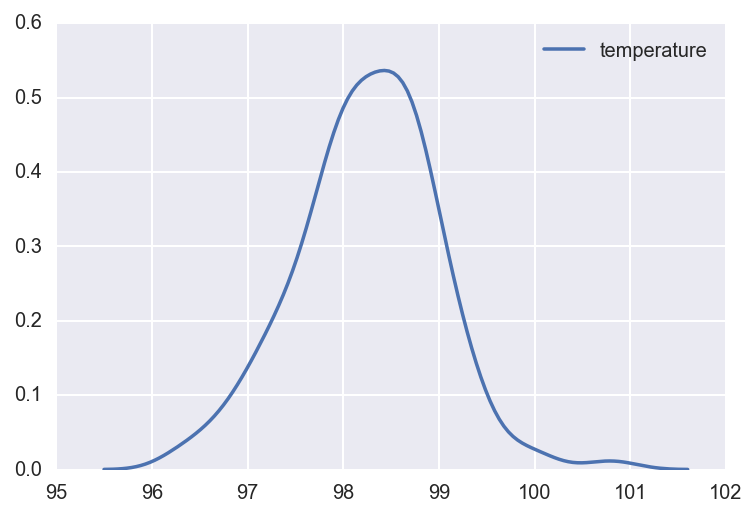

In [39]:
sns.kdeplot(df['temperature'])

4.) With the given data set, I would derive more meaning the any temperature values falling within 1 stdev 97.5 to 98.9 would be a "normal" temperature. A mean of 98.2 does not make it the optimal or normal temperature, but it does provide a better mid point for valid temperatures (for this data set.)

In [40]:
df[df['gender']=='M'].describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.104615,73.369231
std,0.698756,5.875184
min,96.300000,58.000000
25%,97.600000,70.000000
50%,98.100000,73.000000
75%,98.600000,78.000000
max,99.500000,86.000000


In [41]:
df[df['gender']=='F'].describe()

,temperature,heart_rate
count,65.000000,65.000000
mean,98.393846,74.153846
std,0.743488,8.105227
min,96.400000,57.000000
25%,98.000000,68.000000
50%,98.400000,76.000000
75%,98.800000,80.000000
max,100.800000,89.000000


5) There is no appreciable statistical difference between the 2 gender values. 